## New York House Pricing Project ##

This project aims to provide a comprehensive analysis and visualization of property prices in New York using features such as Bath, Beds, Price, and sublocality, among others. We provide insights into how property prices differ by location through the use of machine learning models and geographic mapping, allowing for a simple understanding of market trends and pricing hotspots in one of the world's most dynamic real estate markets.


This will make it easier for buyers, sellers, and real estate brokers to determine the asking price of the home they are interested in. The model will assist users in analyzing the characteristics or major factors that affect a property's pricing.



In [237]:


import pandas as pd
df = pd.read_csv('NY-House-Dataset.csv')

print(df.head())
print(df.shape)


                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                

**Data Cleaning**

In [238]:
df1 = df.drop(['BROKERTITLE','TYPE','ADDRESS','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LONG_NAME','FORMATTED_ADDRESS'], axis='columns')
df1.head()

df1.isnull().sum()

df1['BEDS'] = df['BEDS'].astype(int)
df1['BATH'] = df['BATH'].astype(int)
df1.head()

df2 = df1.copy()
df2['PRICE_PER_SQFT'] = df2['PRICE']/df2['PROPERTYSQFT']
df2.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE,PRICE_PER_SQFT
0,315000,2,2,1400.0,"New York, NY 10022",New York,Manhattan,East 55th Street,40.761255,-73.974483,225.000000
1,195000000,7,10,17545.0,"New York, NY 10019",New York,New York County,New York,40.766393,-73.980991,11114.277572
2,260000,4,2,2015.0,"Staten Island, NY 10312",New York,Richmond County,Staten Island,40.541805,-74.196109,129.032258
3,69000,3,1,445.0,"Manhattan, NY 10022",New York,New York County,New York,40.761398,-73.974613,155.056180
4,55000000,7,2,14175.0,"New York, NY 10065",New York,New York County,New York,40.767224,-73.969856,3880.070547


In [239]:
len(df2.SUBLOCALITY.unique())


21

<Axes: xlabel='LOCALITY'>

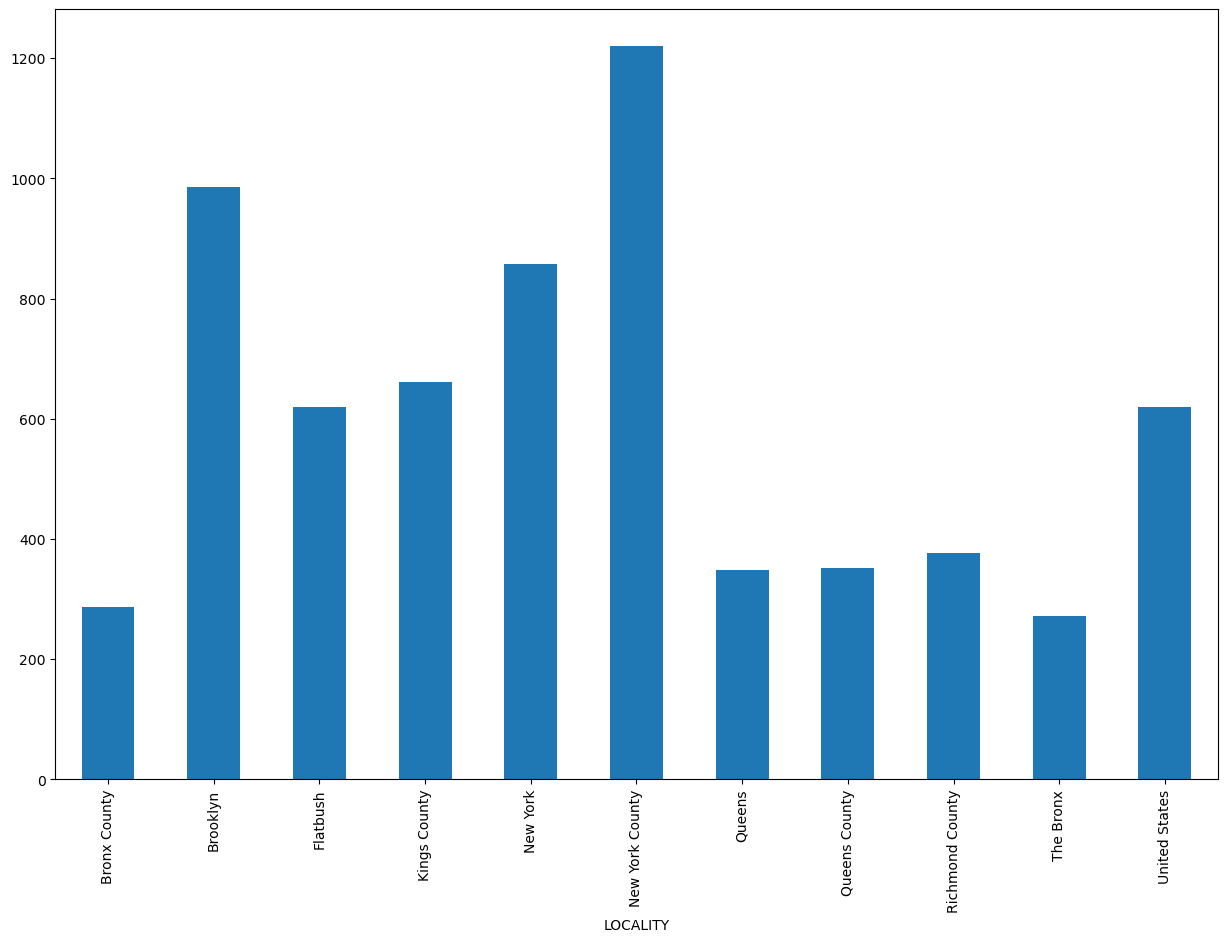

In [240]:
#Average Price per Square Foot by Locality

df2.groupby('LOCALITY')['PRICE_PER_SQFT'].mean().plot(kind='bar')

In [241]:
# Outlier removal
import numpy as np
from matplotlib import pyplot as plt
df2[df2.PROPERTYSQFT/df2.BEDS<300].head()

df3 = df2[~(df2.PROPERTYSQFT/df2.BEDS<300)]
df3.shape

df3.PRICE_PER_SQFT.describe()

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('LOCALITY'):
        m = np.mean(subdf.PRICE_PER_SQFT)
        st = np.std(subdf.PRICE_PER_SQFT)
        reduced_df = subdf[(subdf.PRICE_PER_SQFT>(m-st)) & (subdf.PRICE_PER_SQFT<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape



(4138, 11)

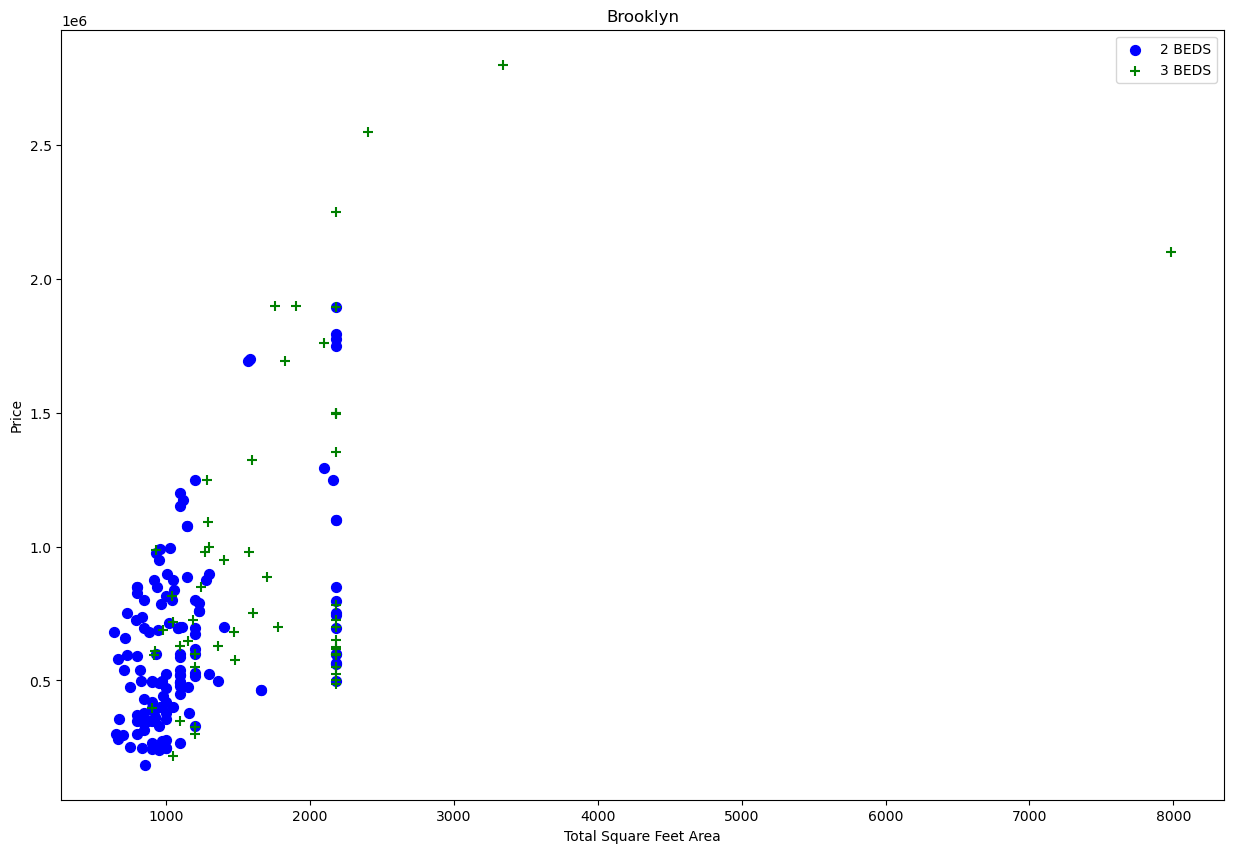

In [242]:
import matplotlib.pyplot as plt
import matplotlib
def plot_scatter_chart(df,SUBLOCALITY):
    BEDS2 = df[(df.SUBLOCALITY==SUBLOCALITY) & (df.BEDS==2)]
    BEDS3 = df[(df.SUBLOCALITY==SUBLOCALITY) & (df.BEDS==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BEDS2.PROPERTYSQFT,BEDS2.PRICE,color='blue',label='2 BEDS', s=50)
    plt.scatter(BEDS3.PROPERTYSQFT,BEDS3.PRICE,marker='+', color='green',label='3 BEDS', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(SUBLOCALITY)
    plt.legend()

plot_scatter_chart(df4,"Brooklyn")

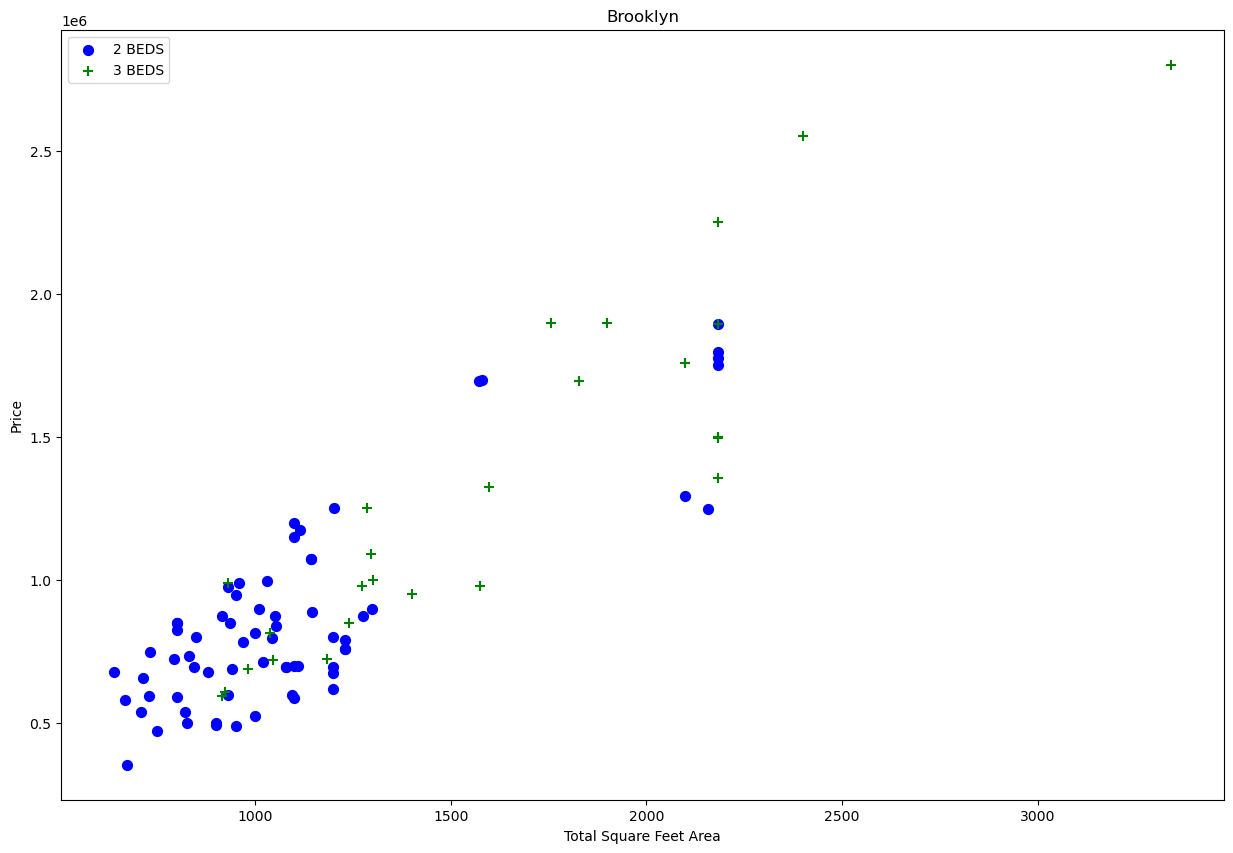

In [243]:
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('SUBLOCALITY'):
        bed_stats = {}
        for bed, bed_df in location_df.groupby('BEDS'):
            bed_stats[bed] = {
                'mean': np.mean(bed_df.PRICE_PER_SQFT),
                'std': np.std(bed_df.PRICE_PER_SQFT),
                'count': bed_df.shape[0]
            }
        for bed, bed_df in location_df.groupby('BEDS'):
            stats = bed_stats.get(bed-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bed_df[bed_df.PRICE_PER_SQFT<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bed_outliers(df4)
df5.shape

plot_scatter_chart(df5,"Brooklyn")

In [244]:
df6 = df5.drop(['STATE','PRICE_PER_SQFT','LOCALITY','STREET_NAME'],axis='columns')
df6.head(3)

encoded_df = pd.get_dummies(df6['SUBLOCALITY'])
encoded_df = encoded_df.astype(int)
print(encoded_df)

      Bronx County  Brooklyn  Coney Island  Flushing  Fort Hamilton  \
0                0         0             0         0              0   
1                0         0             0         0              0   
2                0         0             0         0              0   
3                0         0             0         0              0   
4                0         0             0         0              0   
...            ...       ...           ...       ...            ...   
4120             0         0             0         0              0   
4123             0         0             0         0              0   
4126             0         0             0         0              0   
4133             0         0             0         0              0   
4136             0         0             0         0              0   

      Jackson Heights  Kings County  Manhattan  New York  New York County  \
0                   0             0          0         0              

In [245]:
df7 = pd.concat([df6,encoded_df],axis='columns')
df7.head(5)

X = df7.drop(['PRICE'],axis='columns')
X.head(3)

y = df7.PRICE
y.head()


0    375000
1     90000
2    320000
3    285000
4    105509
Name: PRICE, dtype: int64

In [246]:
# Check available columns in df7
print(df7.columns)


Index(['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'SUBLOCALITY', 'LATITUDE',
       'LONGITUDE', 'Bronx County', 'Brooklyn', 'Coney Island', 'Flushing',
       'Fort Hamilton', 'Jackson Heights', 'Kings County', 'Manhattan',
       'New York', 'New York County', 'Queens', 'Queens County',
       'Richmond County', 'Riverdale', 'Staten Island', 'The Bronx'],
      dtype='object')


<Axes: >

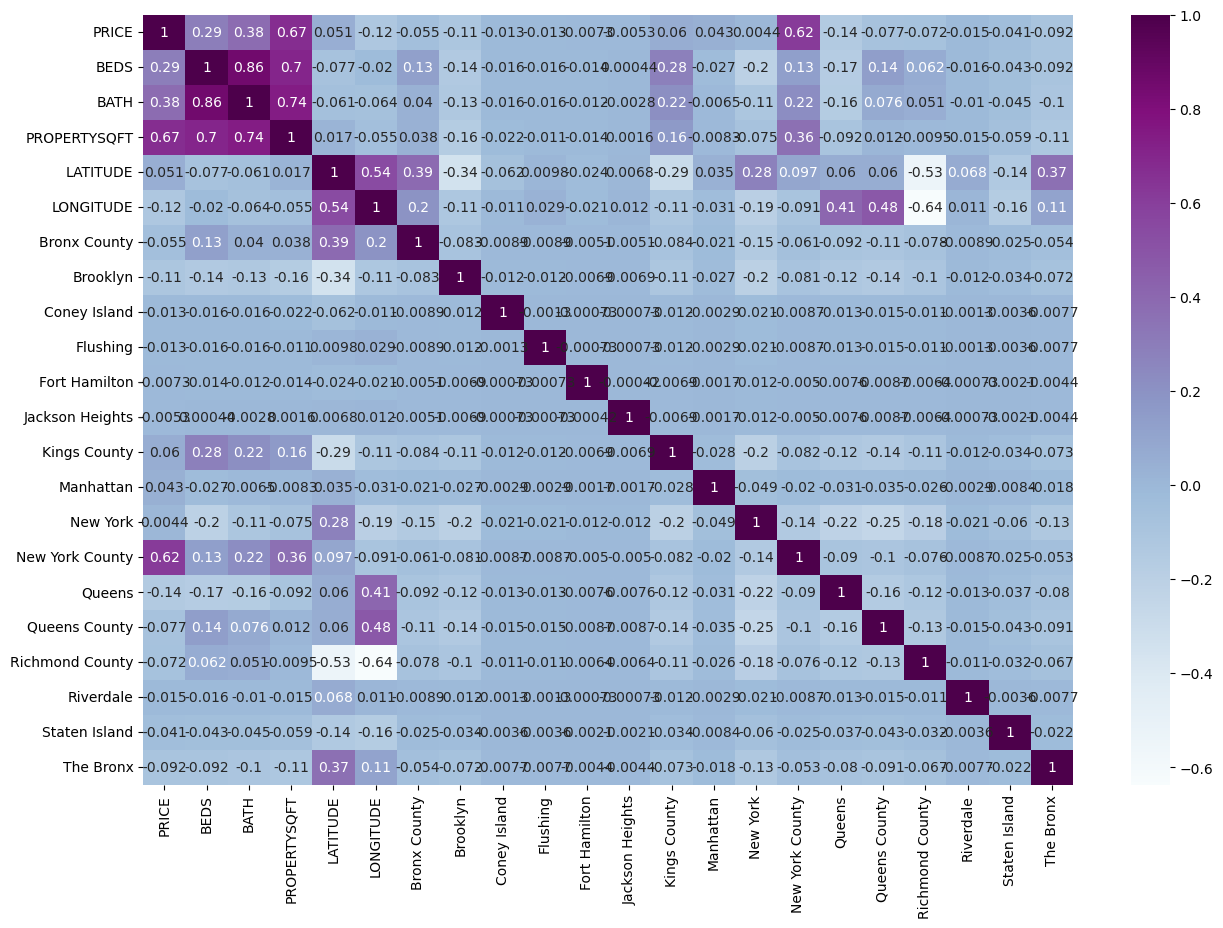

In [247]:
data = df7.drop(['SUBLOCALITY'], axis='columns')
data



data.corr()



import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot= True, cmap="BuPu")

In [248]:
data

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,Bronx County,Brooklyn,Coney Island,Flushing,...,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,375000,2,1,850.000000,40.824870,-73.922983,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,90000,1,1,450.000000,40.842371,-73.923444,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,320000,2,2,936.000000,40.823686,-73.861131,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,285000,2,1,1000.000000,40.836227,-73.861235,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,105509,1,1,650.000000,40.879078,-73.917520,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,445000,1,1,2184.207862,40.748849,-73.971616,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4123,250000,1,2,740.000000,40.912729,-73.902225,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4126,880000,2,2,1120.000000,40.610488,-73.955347,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4133,250000,1,1,800.000000,40.912729,-73.902225,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


 **Linear** **Regression**

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
lr_score = lr_model.score(X_test, y_test)
print("Linear Regression Score :", lr_score)


Linear Regression Score : 0.6140834686893089


In [250]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model using test set
lr_score = lr_model.score(X_test, y_test)
print("Linear Regression Score (Test Set):", lr_score)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=4)  # 4-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Linear Regression Score (Test Set): 0.6140834686893089
Cross-Validation Scores: [ 0.62023083  0.71445634  0.35675991 -0.54608127]
Mean Cross-Validation Score: 0.2863414539932906


**Polynomial** **Regression**

In [251]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Separate features (X) and target variable (y)
X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train the polynomial regression model
degree = 2
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(X_train, y_train)

# Evaluate the polynomial regression model
polyreg_score = polyreg_model.score(X_test, y_test)

print("Polynomial Regression Score:", polyreg_score)


Polynomial Regression Score: 0.8163712684746407


**Lasso regression**

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import pandas as pd


# Separate features (X) and target variable (y)
X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=1, selection='random', max_iter=1000000)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

# Calculate R^2 score on the test set
test_r2_score = r2_score(y_test, y_pred)

print("R^2 Score on Test Set for Lasso Regression:", test_r2_score)


R^2 Score on Test Set for Lasso Regression: 0.640216634761264


**Decision** **Tree**

In [255]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=40)


# Create and fit the decision tree model
model = DecisionTreeRegressor(max_depth = 6)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

dt_score = model.score(X_test, y_test)
print("Decision Tree score:", dt_score )



Decision Tree score: 0.837637901839442


## Gridseach CV of Random forest ##

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Train the best model
best_rf_model.fit(X_train, y_train)

# Evaluate the model
rf_score = best_rf_model.score(X_test, y_test)
print("Random Forest Score after GridSearchCV:", rf_score)
print("Best Parameters:", best_params)


Random Forest Score after GridSearchCV: 0.8059577899180336
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 150}


**k-Nearest Neighbors**

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the KNN model with tuned parameters
knn_model = KNeighborsRegressor(n_neighbors=6, weights='distance', p=2)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate and print the accuracy score
accuracy_score = knn_model.score(X_test, y_test)
print("Accuracy Score:", accuracy_score)



Mean Squared Error: 1362284334907.9905
Accuracy Score: 0.8655435741629245


**Neural Network trained with Keras**

In [113]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

# Define the model with dropout
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.1),  
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, mse = model.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error: {:.4f}".format(mse))


Epoch 1/100


/Users/randinho/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4394 - mse: 0.4396 - val_loss: 0.3518 - val_mse: 0.3547
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8632 - mse: 0.8633 - val_loss: 0.3001 - val_mse: 0.3026
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2800 - mse: 0.2802 - val_loss: 0.2527 - val_mse: 0.2545
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2467 - mse: 0.2469 - val_loss: 0.2643 - val_mse: 0.2663
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1646 - mse: 0.1647 - val_loss: 0.2131 - val_mse: 0.2145
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2388 - mse: 0.2386 - val_loss: 0.2265 - val_mse: 0.2281
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2255 - mse: 0.2256 - val_loss: 0.1877 - val_mse: 0.1885
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2090 - mse: 0.2091 - val_loss: 0.1904 - val_mse: 0.1914
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1694 - mse: 0.1

**Visualizations**

## Random Forest Predictions for New York House Prices ##

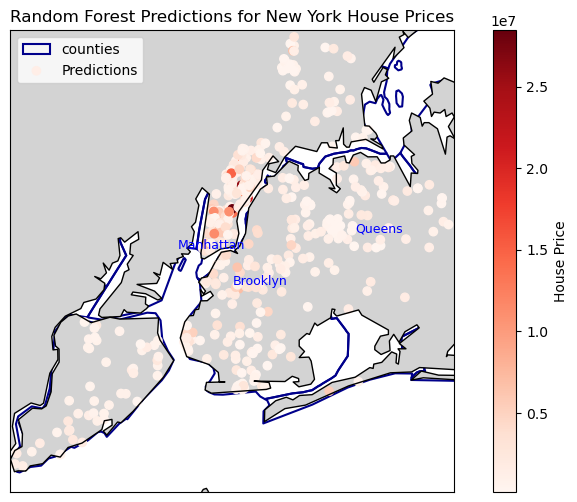

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

# Setting the limits for the map around New York's latitude and longitude
llcrnrlon = -74.2589
llcrnrlat = 40.4774
urcrnrlon = -73.7004
urcrnrlat = 40.9176

m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,
            llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution='h')

m.drawcoastlines()
# Draw counties with increased line width and a different color
m.drawcounties(linewidth=1.5, color='darkblue')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert lat and lon to map projection coordinates
lons, lats = m(X_test['LONGITUDE'].values, X_test['LATITUDE'].values)

# Plot predictions as colored points
m.scatter(lons, lats, c=y_pred, cmap='Reds', marker='o', label='Predictions')

# Find approximate geographic centers of a few counties for demonstration
county_names = ['Manhattan', 'Brooklyn', 'Queens']
county_coords = [(-74.0060, 40.7128), (-73.9442, 40.6782), (-73.7949, 40.7282)]
for name, (lon, lat) in zip(county_names, county_coords):
    x, y = m(lon, lat)
    plt.text(x, y, name, color='blue', fontsize=9, ha='center', va='center')

plt.colorbar(label='House Price')
plt.legend()
plt.title('Random Forest Predictions for New York House Prices')
plt.show()



## Linear Regression Predictions for New York House Prices ##

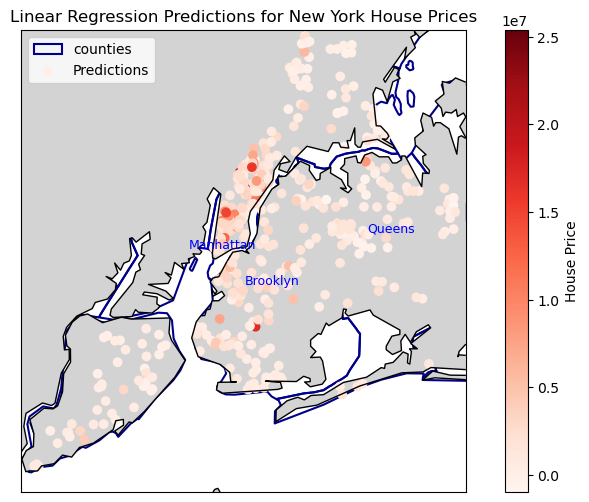

In [140]:
#Linear Regression
df_encoded = pd.get_dummies(df7, columns=['SUBLOCALITY'])

# Separate features (X) and target variable (y)
X_encoded = df_encoded.drop(['PRICE'], axis=1)
y_encoded = df_encoded['PRICE']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=10)

# Train the Linear Regression model
lr_clf_encoded = LinearRegression()
lr_clf_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_encoded = lr_clf_encoded.predict(X_test_encoded)

# Visualization - focusing on New York
plt.figure(figsize=(10, 6))

# Setting the limits for the map around New York's latitude and longitude
llcrnrlon = -74.2589
llcrnrlat = 40.4774
urcrnrlon = -73.7004
urcrnrlat = 40.9176

m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,
            llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution='h')

m.drawcoastlines()
m.drawcounties(linewidth=1.5, color='darkblue')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert lat and lon to map projection coordinates
lons, lats = m(X_test_encoded['LONGITUDE'].values, X_test_encoded['LATITUDE'].values)

# Plot predictions as colored points
m.scatter(lons, lats, c=y_pred_encoded, cmap='Reds', marker='o', label='Predictions')

# Manually add labels for specific counties
county_names = ['Manhattan', 'Brooklyn', 'Queens']
county_coords = [(-74.0060, 40.7128), (-73.9442, 40.6782), (-73.7949, 40.7282)]
for name, (lon, lat) in zip(county_names, county_coords):
    x, y = m(lon, lat)
    plt.text(x, y, name, color='blue', fontsize=9, ha='center', va='center')

plt.colorbar(label='House Price')
plt.legend()
plt.title('Linear Regression Predictions for New York House Prices')
plt.show()


## Neural Network Predictions for New York House Prices ##

Epoch 1/100


/Users/randinho/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3966 - mse: 0.3969 - val_loss: 0.5228 - val_mse: 0.5281
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3964 - mse: 0.3966 - val_loss: 0.4001 - val_mse: 0.4038
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5433 - mse: 0.5433 - val_loss: 0.2828 - val_mse: 0.2854
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2221 - mse: 0.2216 - val_loss: 0.2268 - val_mse: 0.2286
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2654 - mse: 0.2655 - val_loss: 0.2128 - val_mse: 0.2143
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2684 - mse: 0.2685 - val_loss: 0.1947 - val_mse: 0.1961
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2608 - mse: 0.2594 - val_loss: 0.1943 - val_mse: 0.1957
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2169 - mse: 0.2170 - val_loss: 0.1954 - val_mse: 0.1965
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2242 - mse: 0.

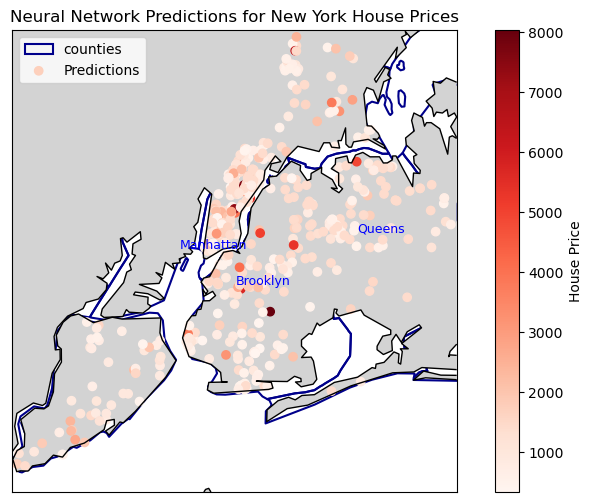

In [114]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

# Define the model with dropout
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.1),  
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, mse = model.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error: {:.4f}".format(mse))

# Make predictions
y_pred = model.predict(X_test).flatten()

# Visualization - focusing on New York
plt.figure(figsize=(10, 6))

# Setting the limits for the map around New York's latitude and longitude
llcrnrlon = -74.2589
llcrnrlat = 40.4774
urcrnrlon = -73.7004
urcrnrlat = 40.9176

m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,
            llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution='h')

m.drawcoastlines()
m.drawcounties(linewidth=1.5, color='darkblue')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert lat and lon to map projection coordinates
lons, lats = m(X_test['LONGITUDE'].values, X_test['LATITUDE'].values)

# Plot predictions as colored points
m.scatter(lons, lats, c=y_pred, cmap='Reds', marker='o', label='Predictions')

# Add county names
county_names = ['Manhattan', 'Brooklyn', 'Queens']
county_coords = [(-74.0060, 40.7128), (-73.9442, 40.6782), (-73.7949, 40.7282)]
for name, (lon, lat) in zip(county_names, county_coords):
    x, y = m(lon, lat)
    plt.text(x, y, name, color='blue', fontsize=9, ha='center', va='center')

plt.colorbar(label='House Price')
plt.legend()
plt.title('Neural Network Predictions for New York House Prices')
plt.show()
